
# Exploratory Data Analysis (EDA) of the 2022 T20 World Cup Data

# Import Required Libraries

This cell imports the necessary Python libraries for data manipulation and visualization. pandas is used for handling DataFrames, and matplotlib.pyplot


In [ ]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt


#  Load the Dataset
This code reads the 'MensT20wcdata (1).csv' file into a pandas DataFrame named df. This DataFrame will be the primary source for all subsequent data analysis.

In [ ]:
# Step 2: Load the 2022 T20 World Cup dataset
df = pd.read_csv("/content/MensT20wcdata (1).csv")  # apna file path adjust karen




# This cell displays the first 5 rows of the DataFrame df.head() to get a quick overview of its structure, columns, and initial content.

In [ ]:
df.head()

,Match_id,Team_1,Team_2,Venue,Stage,Toss_winner,Toss_decision,Score_of_first_innings,Wkts_in_first_innings,Score_of_second_innings,Wkts_in_second_innings,Winner,Won by,Player_of_the_match
0,1,Namibia,Sri Lanka,"GMHBA Stadium, South Geelong, Victoria",First Round,Sri Lanka,Field,163,7,108,10,Namibia,55 Runs,Jan Frylinck
1,2,UAE,Netherlands,"GMHBA Stadium, South Geelong, Victoria",First Round,UAE,Bat,111,8,112,7,Netherlands,3 Wickets,Bas de Leede
2,3,Scotland,West Indies,"Bellerive Oval, Hobart",First Round,West Indies,Field,160,5,118,10,Scotland,42 Runs,George Munsey
3,4,Zimbave,Ireland,"Bellerive Oval, Hobart",First Round,Ireland,Field,174,7,143,9,Zimbave,31 Runs,Sikandar Raza
4,5,Namibia,Netherlands,"GMHBA Stadium, South Geelong, Victoria",First Round,Namibia,Bat,121,6,122,5,Netherlands,5 Wickets,\nBas de Leede


# Check dataset structure
# Columns aur data types

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Match_id                 45 non-null     int64 
 1   Team_1                   45 non-null     object
 2   Team_2                   45 non-null     object
 3                Venue       45 non-null     object
 4   Stage                    45 non-null     object
 5   Toss_winner              45 non-null     object
 6   Toss_decision            45 non-null     object
 7   Score_of_first_innings   45 non-null     object
 8   Wkts_in_first_innings    45 non-null     object
 9   Score_of_second_innings  45 non-null     object
 10  Wkts_in_second_innings   45 non-null     object
 11  Winner                   45 non-null     object
 12  Won by                   45 non-null     object
 13  Player_of_the_match      45 non-null     object
dtypes: int64(1), object(13)
memory usage: 5.1+ K

# Column names

In [ ]:

df.columns



Index(['Match_id', 'Team_1', 'Team_2', '             Venue', 'Stage',
       'Toss_winner', 'Toss_decision', 'Score_of_first_innings',
       'Wkts_in_first_innings', 'Score_of_second_innings',
       'Wkts_in_second_innings', 'Winner', 'Won by', 'Player_of_the_match'],
      dtype='object')

# Numeric summary

In [ ]:

df.describe()


,Match_id
count,45.000000
mean,23.000000
std,13.133926
min,1.000000
25%,12.000000
50%,23.000000
75%,34.000000
max,45.000000


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Match_id,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0


# Total Pakistan matches

In [ ]:
pakistan_matches.shape

(7, 16)

# Unique Teams Identified
A total of 17 unique teams were found, including 'Namibia', 'UAE', 'Scotland', 'Zimbave', 'Sri Lanka', 'West Indies', 'New Zealand', 'Afghanistan', 'Ireland', 'Pakistan', 'Bangladesh', 'South Africa', 'India', 'Australia', 'Netherlands', 'England', and 'Netherlands ' (note the duplicated 'Netherlands ' due to possible trailing space).

In [ ]:
# Check unique teams that participated
print("Unique Teams in Team_1:", df['Team_1'].nunique())
print("Unique Teams in Team_2:", df['Team_2'].nunique())

# Combined list of unique teams
all_teams = pd.concat([df['Team_1'], df['Team_2']]).unique()
print(f"\nTotal Unique Teams: {len(all_teams)}")
print("List of Unique Teams:\n", all_teams)

Unique Teams in Team_1: 16
Unique Teams in Team_2: 15

Total Unique Teams: 17
List of Unique Teams:
 ['Namibia' 'UAE' 'Scotland' 'Zimbave' 'Sri Lanka' 'West Indies'
 'New Zealand' 'Afghanistan' 'Ireland' 'Pakistan' 'Bangladesh'
 'South Africa' 'India' 'Australia' 'Netherlands' 'England' 'Netherlands ']


## Pakistan's Performance Comparison with Other Teams

In [ ]:
# Identify opponents and match outcomes for Pakistan
def get_opponent_and_result(row):
    if row['Team_1'] == 'Pakistan':
        return row['Team_2'], 'Win' if row['Winner'] == 'Pakistan' else 'Loss'
    elif row['Team_2'] == 'Pakistan':
        return row['Team_1'], 'Win' if row['Winner'] == 'Pakistan' else 'Loss'
    return None, None

# Fix: Use .loc to ensure we are modifying the DataFrame directly and avoid SettingWithCopyWarning
pakistan_matches_copy = pakistan_matches.copy()
pakistan_matches_copy[['Opponent', 'Result']] = pakistan_matches_copy.apply(get_opponent_and_result, axis=1, result_type='expand')

# Count wins and losses against each opponent
pakistan_performance = pakistan_matches_copy.groupby('Opponent')['Result'].value_counts().unstack(fill_value=0)

# Calculate total matches against each opponent and win percentage
pakistan_performance['Total Matches'] = pakistan_performance.sum(axis=1)
pakistan_performance['Win Percentage'] = (pakistan_performance['Win'] / pakistan_performance['Total Matches']) * 100

display(pakistan_performance.sort_values(by='Win Percentage', ascending=False))

Result,Loss,Win,Total Matches,Win Percentage
Opponent,,,,
Bangladesh,0,1,1,100.0
New Zealand,0,1,1,100.0
Netherlands,0,1,1,100.0
South Africa,0,1,1,100.0
England,1,0,1,0.0
India,1,0,1,0.0
Zimbave,1,0,1,0.0


# Pakistan Performance Table
The output table pakistan_performance shows Pakistan's wins, losses, total matches, and win percentage against each opponent. For instance, Pakistan achieved a 100% win rate against Bangladesh, New Zealand, Netherlands, and South Africa, but a 0% win rate against England, India, and Zimbabwe.

# Visualize Pakistan's Wins and Losses against Opponents
This cell generates a bar chart to visually represent Pakistan's wins (green) and losses (red) against each opponent team in the 2022 T20 World Cup. This provides an easy-to-understand comparison of their head-to-head performance.

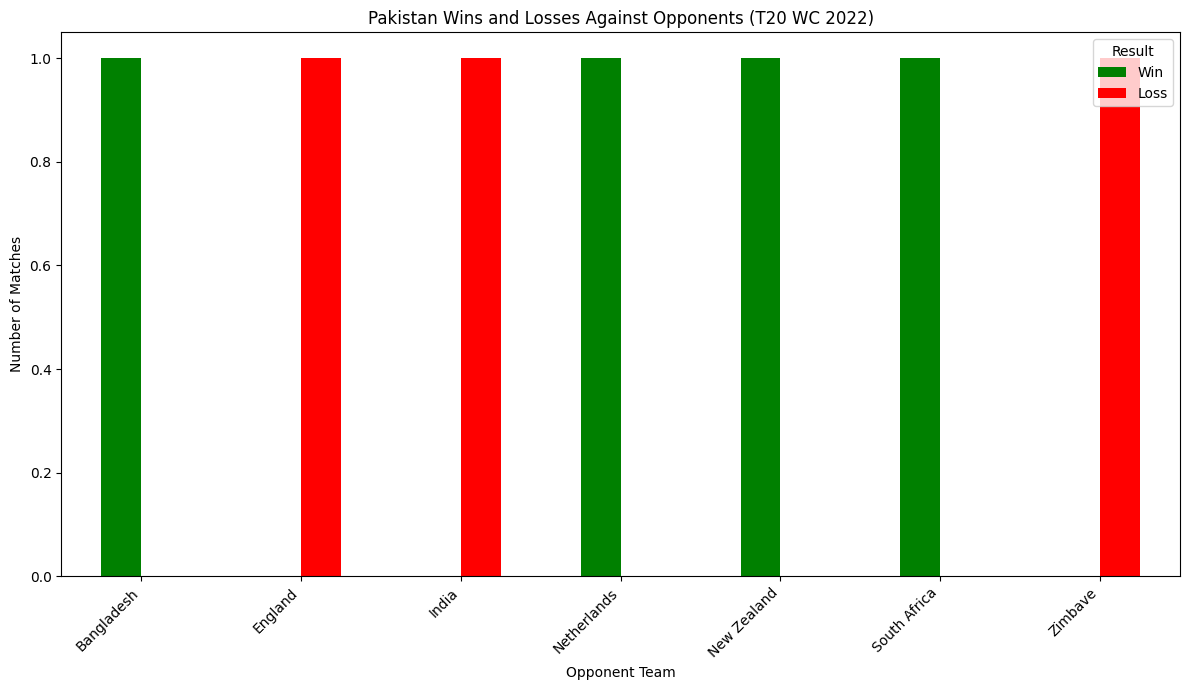

In [ ]:
# Visualize Pakistan's Wins and Losses against each Opponent
pakistan_performance[['Win', 'Loss']].plot(kind='bar', figsize=(12, 7), color=['green', 'red'])
plt.title('Pakistan Wins and Losses Against Opponents (T20 WC 2022)')
plt.xlabel('Opponent Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Result')
plt.tight_layout()
plt.show()

# Visualize Top 5 Winning Teams
This code identifies the top 5 teams with the most wins in the entire tournament and generates a bar plot to visually display their respective win counts. This highlights the most successful teams of the World Cup.

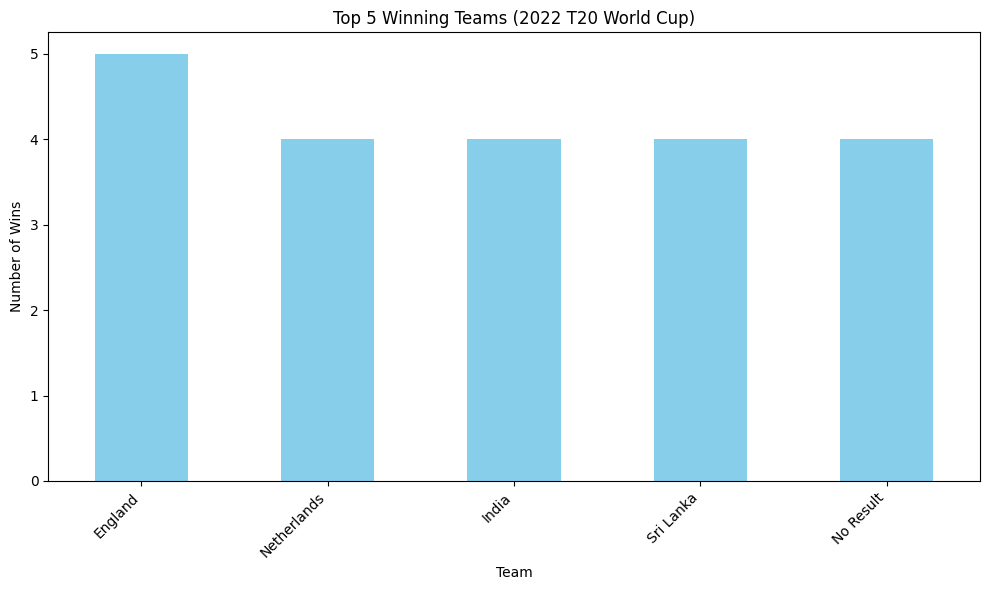

In [ ]:
# Visualize Top 5 Winning Teams
top_5_winners = df['Winner'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_5_winners.plot(kind='bar', color='skyblue')
plt.title('Top 5 Winning Teams (2022 T20 World Cup)')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Toss Decisions Plot
The pie chart effectively displays the percentage of times teams chose to bat or field after winning the toss, along with a small percentage of 'unknown' decisions, providing insights into preferred game-start strategies.

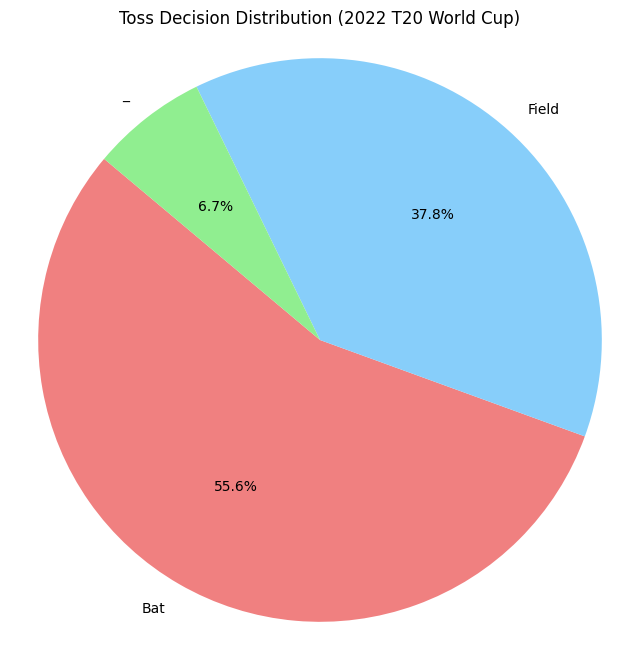

In [ ]:
# Visualize Toss Decision Distribution
toss_decisions = df['Toss_decision'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Toss Decision Distribution (2022 T20 World Cup)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Venue Analysis
Seven unique venues were identified for the tournament. Bellerive Oval in Hobart hosted the most matches with 9, followed by Sydney, Melbourne, and Adelaide each with 7 matches.

In [ ]:
# Check unique venues
print("Unique Venues:", df['             Venue'].nunique())
print("\nVenues and their match counts:")
print(df['             Venue'].value_counts())

Unique Venues: 7

Venues and their match counts:
             Venue
Bellerive Oval, Hobart                    9
Sydney Cricket Ground, Sydney             7
Melbourne Cricket Ground, Melbourne       7
Adelaide Oval, Adelaide                   7
GMHBA Stadium, South Geelong, Victoria    6
Perth Stadium, Perth                      5
The Gabba, Brisbane                       4
Name: count, dtype: int64


# Tournament Stages Analysis
The tournament consisted of 4 unique stages: 'Group' (31 matches), 'First Round' (11 matches), 'Semi Final' (2 matches), and the 'Final' (1 match), reflecting a standard tournament progression.

In [ ]:
# Check unique stages of the tournament
print("Unique Stages:", df['Stage'].nunique())
print("\nStages and their match counts:")
print(df['Stage'].value_counts())

Unique Stages: 4

Stages and their match counts:
Stage
Group          31
First Round    11
Semi Final      2
Final           1
Name: count, dtype: int64


# Toss Decisions Listed
The unique toss decisions identified are 'Bat' (25 times), 'Field' (17 times), and 3 instances of an undefined decision ('_'), showing a preference for batting first.

In [ ]:
# Check unique toss decisions
print("Unique Toss Decisions:", df['Toss_decision'].nunique())
print("\nToss Decisions and their counts:")
print(df['Toss_decision'].value_counts())

Unique Toss Decisions: 3

Toss Decisions and their counts:
Toss_decision
Bat      25
Field    17
_         3
Name: count, dtype: int64


# Match Winners Count
England had the highest number of wins (5), followed by Netherlands, India, Sri Lanka, and Pakistan (along with 'No Result') all with 4 wins, highlighting the top performing teams.

In [ ]:
# Check winner counts
print("\nMatch Winners and their counts:")
print(df['Winner'].value_counts())


Match Winners and their counts:
Winner
England         5
Netherlands     4
India           4
Sri Lanka       4
No Result       4
Pakistan        4
Ireland         3
Zimbave         3
Australia       3
New Zealand     3
Bangladesh      2
South Africa    2
UAE             1
West Indies     1
Namibia         1
Scotland        1
Name: count, dtype: int64
